In [123]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [124]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns

sns.set_style('whitegrid')

import re
import string
import warnings

warnings.filterwarnings('ignore')
import gensim.downloader as api
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from pylab import rcParams
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import (CountVectorizer, TfidfTransformer,
                                             TfidfVectorizer)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score,
                             precision_score, recall_score, roc_curve)
from sklearn.model_selection import (GridSearchCV, RepeatedStratifiedKFold,
                                     StratifiedKFold, cross_val_score,
                                     train_test_split)
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from wordcloud import WordCloud
from xgboost import XGBClassifier

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import pickle
import unicodedata


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [125]:
df = pd.read_csv('/content/Reviews.csv', sep ='|')

In [126]:
df.head()

,buyerName,buyerCountry,Evaluation,buyerFeedback,buyerProductFeedBack,buyerTranslationFeedback,downVoteCount,upVoteCount,evalData,evaluationId,responsiveness,warrantyService,functionality,status
0,L***a,BR,100,Foi uma ótima compra. Item de acordo com o des...,NaN,Was a great buy. Item according to the describ...,0,0,09 Apr 2024,60080995549271264,NaN,NaN,NaN,1
1,Щ***ч,RU,100,Товар соответствует описанию. Визуально все в ...,NaN,Item as described. Visually everything is norm...,0,0,23 Jan 2024,50109430005211774,NaN,NaN,NaN,1
2,L***R,BR,100,"Possui um bom matéria, corrente bem fina pense...",NaN,"It has a good matter, very thin chain I though...",2,0,16 Dec 2023,60077029346436454,NaN,NaN,NaN,1
3,A***a,MX,100,no lo he probado pero parece lo suficientement...,NaN,I haven't tried it but it seems good enough to...,0,0,01 Jan 2024,60078089203734379,NaN,NaN,NaN,1
4,v***r,UA,100,Замовлення було швидко доставлено в Київ через...,NaN,Bulo Shvidko was delivered to Kiev through the...,0,0,06 Apr 2024,30070787000237584,NaN,NaN,NaN,1


In [127]:
df.describe()

,Evaluation,buyerProductFeedBack,downVoteCount,upVoteCount,evaluationId,responsiveness,warrantyService,functionality,status
count,2000.000000,0.0,2000.000000,2000.00000,2.000000e+03,0.0,0.0,0.0,2000.0
mean,95.430000,NaN,0.084500,0.08050,4.303223e+16,NaN,NaN,NaN,1.0
std,13.557544,NaN,0.361144,0.43831,1.356860e+16,NaN,NaN,NaN,0.0
min,20.000000,NaN,0.000000,0.00000,2.004491e+16,NaN,NaN,NaN,1.0
25%,100.000000,NaN,0.000000,0.00000,3.006736e+16,NaN,NaN,NaN,1.0
50%,100.000000,NaN,0.000000,0.00000,3.007133e+16,NaN,NaN,NaN,1.0
75%,100.000000,NaN,0.000000,0.00000,6.007511e+16,NaN,NaN,NaN,1.0
max,100.000000,NaN,9.000000,10.00000,6.008124e+16,NaN,NaN,NaN,1.0


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   buyerName                 2000 non-null   object 
 1   buyerCountry              2000 non-null   object 
 2   Evaluation                2000 non-null   int64  
 3   buyerFeedback             670 non-null    object 
 4   buyerProductFeedBack      0 non-null      float64
 5   buyerTranslationFeedback  670 non-null    object 
 6   downVoteCount             2000 non-null   int64  
 7   upVoteCount               2000 non-null   int64  
 8   evalData                  2000 non-null   object 
 9   evaluationId              2000 non-null   int64  
 10  responsiveness            0 non-null      float64
 11  warrantyService           0 non-null      float64
 12  functionality             0 non-null      float64
 13  status                    2000 non-null   int64  
dtypes: float

In [129]:
df.dropna(axis=0, how = 'any', subset = ['buyerTranslationFeedback'], inplace=True)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 670 entries, 0 to 698
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   buyerName                 670 non-null    object 
 1   buyerCountry              670 non-null    object 
 2   Evaluation                670 non-null    int64  
 3   buyerFeedback             670 non-null    object 
 4   buyerProductFeedBack      0 non-null      float64
 5   buyerTranslationFeedback  670 non-null    object 
 6   downVoteCount             670 non-null    int64  
 7   upVoteCount               670 non-null    int64  
 8   evalData                  670 non-null    object 
 9   evaluationId              670 non-null    int64  
 10  responsiveness            0 non-null      float64
 11  warrantyService           0 non-null      float64
 12  functionality             0 non-null      float64
 13  status                    670 non-null    int64  
dtypes: float64(4), 

In [131]:
df.drop(axis = 1, columns = ['buyerName','buyerCountry','buyerFeedback','buyerProductFeedBack','evaluationId','responsiveness','downVoteCount','upVoteCount','evalData','warrantyService','functionality','status'], inplace = True)

In [132]:
df.head()

,Evaluation,buyerTranslationFeedback
0,100,Was a great buy. Item according to the describ...
1,100,Item as described. Visually everything is norm...
2,100,"It has a good matter, very thin chain I though..."
3,100,I haven't tried it but it seems good enough to...
4,100,Bulo Shvidko was delivered to Kiev through the...


In [133]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [134]:
import spacy

In [135]:
def data_cleaner(text):
  text_nopunct = ''.join([char for char in text if char not in string.punctuation])
  text_tokenized = re.split('\W+', text_nopunct.lower())
  text_nostop = ' '.join([word for word in text_tokenized if word not in nltk.corpus.stopwords.words('english')])

  return text_nostop
  # nlp = spacy.load('en_core_web_sm')
  # text = nlp(text_nostop)
  # text_lemmatized = ' '.join([word.lemma_ for word in text])
  # return text_lemmatized

In [136]:
data_cleaner("hi, i'm not as bad as you think")

'hi im bad think'

In [137]:
ps = nltk.PorterStemmer()

In [138]:
#applying the function to the feedback
df['cleaned_text'] = df['buyerTranslationFeedback'].apply(lambda x: data_cleaner(x))

In [139]:
df['feedback_stemmed'] = df['cleaned_text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

In [140]:
df.head()

,Evaluation,buyerTranslationFeedback,cleaned_text,feedback_stemmed
0,100,Was a great buy. Item according to the describ...,great buy item according described ad im satis...,great buy item accord describ ad im satisfi re...
1,100,Item as described. Visually everything is norm...,item described visually everything normal good...,item describ visual everyth normal good chain ...
2,100,"It has a good matter, very thin chain I though...",good matter thin chain thought thicker needs t...,good matter thin chain thought thicker need te...
3,100,I haven't tried it but it seems good enough to...,havent tried seems good enough cut wood hurry ...,havent tri seem good enough cut wood hurri rec...
4,100,Bulo Shvidko was delivered to Kiev through the...,bulo shvidko delivered kiev misstekspres didnt...,bulo shvidko deliv kiev misstekspr didnt get r...


In [141]:
#feature engineering

In [142]:
df['Evaluation'] = df['Evaluation']/20

In [143]:
df['Evaluation'].unique()

array([5., 4., 3., 2., 1.])

In [144]:
df['Evaluation'] = df['Evaluation'].astype(int)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 670 entries, 0 to 698
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Evaluation                670 non-null    int64 
 1   buyerTranslationFeedback  670 non-null    object
 2   cleaned_text              670 non-null    object
 3   feedback_stemmed          670 non-null    object
dtypes: int64(1), object(3)
memory usage: 26.2+ KB


In [146]:
def polarize(x):
  if x > 3:
    return 'positive'
  elif x == 3:
    return 'neutral'
  else:
    return 'negative'


In [147]:
df['polarity'] = df['Evaluation'].apply(lambda x: polarize(x))

In [148]:
df['polarity'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

[Text(0.5, 1.0, 'No of Reviews for each Polarity Rating')]

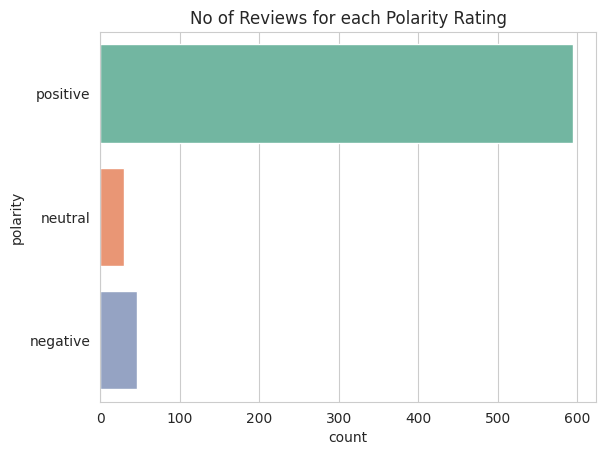

In [149]:
sns.countplot(df['polarity'], palette = 'Set2').set(title = 'No of Reviews for each Polarity Rating')

In [150]:
df.drop(columns = ['Evaluation', 'buyerTranslationFeedback', 'cleaned_text'], axis = 1, inplace = True)

In [151]:
df.head()

,feedback_stemmed,polarity
0,great buy item accord describ ad im satisfi re...,positive
1,item describ visual everyth normal good chain ...,positive
2,good matter thin chain thought thicker need te...,positive
3,havent tri seem good enough cut wood hurri rec...,positive
4,bulo shvidko deliv kiev misstekspr didnt get r...,positive


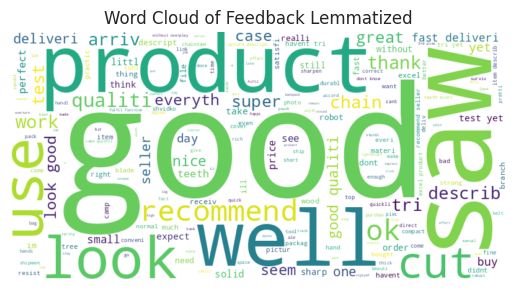

In [152]:
from wordcloud import WordCloud

# Flatten the list of word lists into a single list of words
all_stemmed = [B for B in df['feedback_stemmed']]

# Join the words into a single string
text = ' '.join(all_stemmed)

# Create a word cloud from the lemmas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Feedback Lemmatized')
plt.show()

In [153]:
counti = len(df.loc[df['polarity']== 'positive'])
counti

594

In [154]:
df_positive = df.loc[df['polarity']== 'positive'].sample(594, replace=False)
df_neutral = df.loc[df['polarity']== 'neutral']
df_negative = df.loc[df['polarity']== 'negative']

In [155]:
df_neutral = df.loc[df['polarity']== 'neutral'].sample(594, replace=True)
df_negative = df.loc[df['polarity']== 'negative'].sample(594, replace=True)


In [156]:
df = pd.concat([df_positive, df_neutral, df_negative])

In [157]:
df.head()

,feedback_stemmed,polarity
67,viglyad soundli turn robot take everi vipadok,positive
9,great case attach belt threw carmayb come handi,positive
151,pilingalreadi thyr shine,positive
17,havent done test yet air robust fulfil function,positive
698,good,positive


In [158]:
# Do encoding for Polarity ratings
df.loc[df['polarity']== 'negative', 'polarity'] = 0
df.loc[df['polarity']== 'neutral', 'polarity'] = 1
df.loc[df['polarity']== 'positive', 'polarity'] = 2

In [159]:
# convert the datatype of Polarity_Rating to integer
df['polarity'] = df['polarity'].astype('int64')

In [160]:
df

,feedback_stemmed,polarity
67,viglyad soundli turn robot take everi vipadok,2
9,great case attach belt threw carmayb come handi,2
151,pilingalreadi thyr shine,2
17,havent done test yet air robust fulfil function,2
698,good,2
...,...,...
354,item receiv,0
248,mediums wood cutter gadi tortur shoulder good ...,0
268,pa reçu,0
330,dont lot teeth,0


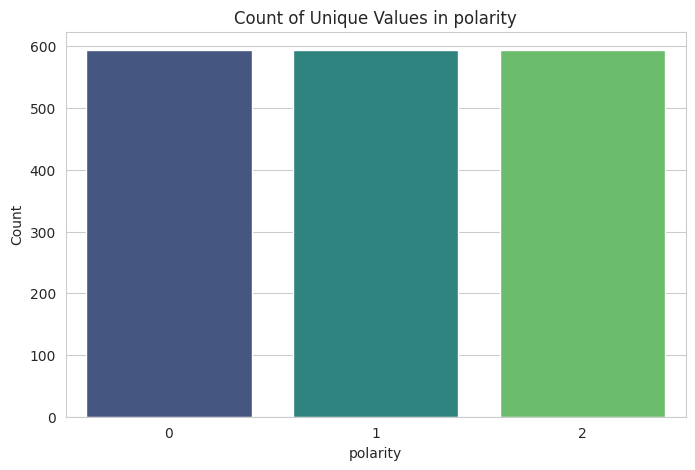

In [161]:
plt.figure(figsize=(8, 5))  # Set figure size
sns.countplot(data=df, x='polarity', palette='viridis')  # Countplot
plt.title('Count of Unique Values in polarity')  # Title
plt.xlabel('polarity')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.show()

In [162]:
X = df["feedback_stemmed"]
y = df.drop("feedback_stemmed", axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
, stratify = y)

In [163]:
# Create pipeline
pipe = Pipeline([('vectorizer', TfidfVectorizer(lowercase=False, sublinear_tf = True)),
 ('classifier', RandomForestClassifier(max_depth=50, random_state=42, class_weight = 'balanced'))])


In [164]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(lowercase=False, sublinear_tf=True)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=50,
                                        random_state=42))])